In [1]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
df = pd.read_csv("C:/Users/patra/Downloads/Family_guy_dialog.csv")

# Display the first 5 rows of the DataFrame
print(df.head(10))


  character                                             dialog   seasons
0    Stewie   Damn you, vile woman! Youve impeded my work s...  season 1
1    Stewie                                     Hello, Mother.  season 1
2      Lois                          Well, hi, there, sweetie!  season 1
3    Stewie   You know, Mother, life is like a box of choco...  season 1
4    Stewie   Now, I offer you one last chance for deliverance  season 1
5      Lois   Oh, you just want your toy back. OK, here you...  season 1
6    Stewie   Yes, well, victory is mine! Stewie runs out o...  season 1
7    Stewie   playing with his Sesame Street phone Put me t...  season 1
8    Stewie   Dont toy with me, Ernie! Ive already dispatch...  season 1
9    Stewie   Hoho, indeed I can! pulls out a laser gun and...  season 1


In [2]:
print(df.isnull().sum())
df.fillna(value='Unknown', inplace=True)
print(df.head(10))

character    0
dialog       0
seasons      0
dtype: int64
  character                                             dialog   seasons
0    Stewie   Damn you, vile woman! Youve impeded my work s...  season 1
1    Stewie                                     Hello, Mother.  season 1
2      Lois                          Well, hi, there, sweetie!  season 1
3    Stewie   You know, Mother, life is like a box of choco...  season 1
4    Stewie   Now, I offer you one last chance for deliverance  season 1
5      Lois   Oh, you just want your toy back. OK, here you...  season 1
6    Stewie   Yes, well, victory is mine! Stewie runs out o...  season 1
7    Stewie   playing with his Sesame Street phone Put me t...  season 1
8    Stewie   Dont toy with me, Ernie! Ive already dispatch...  season 1
9    Stewie   Hoho, indeed I can! pulls out a laser gun and...  season 1


In [3]:
#grouping data according to season number
grouped=df.groupby('seasons')
for name, group in grouped:
    print(f"{name}:")
    print(group)

season 1:
                character                                             dialog   
0                  Stewie   Damn you, vile woman! Youve impeded my work s...  \
1                  Stewie                                     Hello, Mother.   
2                    Lois                          Well, hi, there, sweetie!   
3                  Stewie   You know, Mother, life is like a box of choco...   
4                  Stewie   Now, I offer you one last chance for deliverance   
5                    Lois   Oh, you just want your toy back. OK, here you...   
6                  Stewie   Yes, well, victory is mine! Stewie runs out o...   
7                  Stewie   playing with his Sesame Street phone Put me t...   
8                  Stewie   Dont toy with me, Ernie! Ive already dispatch...   
9                  Stewie   Hoho, indeed I can! pulls out a laser gun and...   
10                 Stewie   Damn the broccoli, damn you, and damn the Wri...   
11                   Lois     

In [4]:
#find dialog count 
groupednew=grouped['dialog'].count().sum()
print(groupednew)

1377


In [5]:
grouped = df.groupby('seasons')['dialog'].count()

# Print the result
print(grouped)

seasons
season 1      46
season 10    168
season 12    217
season 2     129
season 3     110
season 4     155
season 5     139
season 6      94
season 7      80
season 8     117
season 9     122
Name: dialog, dtype: int64


In [6]:
# Group the DataFrame by season and calculate the average length of dialog lines for each group
grouped = df.groupby('seasons')
for name, group in grouped:
    print(f"{name}:")
    line_lengths = group['dialog'].apply(len)
    avg_length = line_lengths.mean()
    print(f"Average dialog length for {name}: {avg_length}")


season 1:
Average dialog length for season 1: 77.8913043478261
season 10:
Average dialog length for season 10: 66.19642857142857
season 12:
Average dialog length for season 12: 61.26267281105991
season 2:
Average dialog length for season 2: 68.30232558139535
season 3:
Average dialog length for season 3: 56.31818181818182
season 4:
Average dialog length for season 4: 72.93548387096774
season 5:
Average dialog length for season 5: 69.76978417266187
season 6:
Average dialog length for season 6: 61.361702127659576
season 7:
Average dialog length for season 7: 60.9375
season 8:
Average dialog length for season 8: 89.53846153846153
season 9:
Average dialog length for season 9: 62.09016393442623


In [7]:
grouped = df.groupby(['seasons', 'character'])
character_counts = grouped.size()
unique_characters = character_counts.groupby('seasons').apply(lambda x: x[x == 1].index.get_level_values('character'))

# Print the unique characters for each season
for season, characters in unique_characters.items():
    print(f"{season}: {characters}")


season 1: Index(['Chris'], dtype='object', name='character')
season 10: Index([], dtype='object', name='character')
season 12: Index([], dtype='object', name='character')
season 2: Index(['Quagmire'], dtype='object', name='character')
season 3: Index([], dtype='object', name='character')
season 4: Index([], dtype='object', name='character')
season 5: Index([], dtype='object', name='character')
season 6: Index([], dtype='object', name='character')
season 7: Index([], dtype='object', name='character')
season 8: Index([], dtype='object', name='character')
season 9: Index([], dtype='object', name='character')


In [8]:
import matplotlib.pyplot as plt

In [9]:
grouped.dtypes

character  dialog seasons
seasons  character                                      
season 1 Brian                    object  object  object
         Chris                    object  object  object
         Lois                     object  object  object
         Maids and Butlers M&B    object  object  object
         Meg                      object  object  object
...                                  ...     ...     ...
season 9 Lois                     object  object  object
         Meg                      object  object  object
         Peter                    object  object  object
         Quagmire                 object  object  object
         Stewie                   object  object  object

[79 rows x 3 columns]

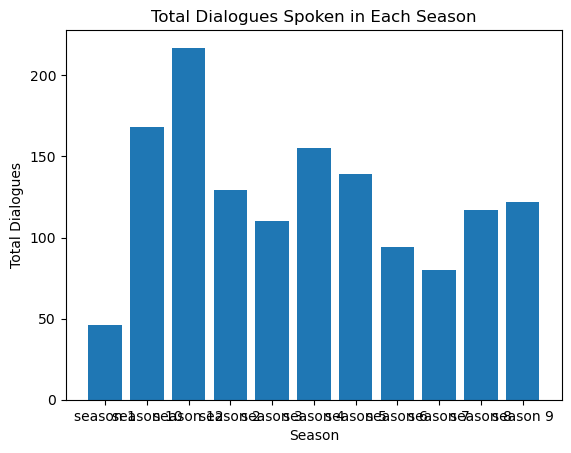

In [15]:
import matplotlib.pyplot as plt

# Grouping data by season and calculating dialogue count
grouped = df.groupby('seasons')['dialog'].count()

# Plotting the bar plot
plt.bar(grouped.index, grouped.values)

# Adding labels and title
plt.xlabel('Season')
plt.ylabel('Total Dialogues')
plt.title('Total Dialogues Spoken in Each Season')

# Displaying the plot
plt.show()

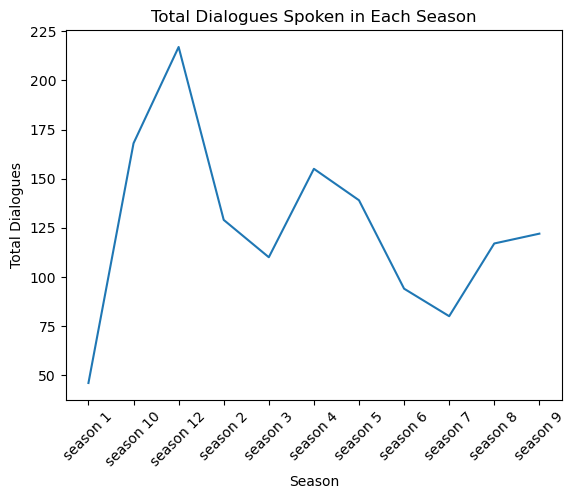

In [16]:
fig, ax = plt.subplots()
ax.plot(grouped.index, grouped.values)

# Adding labels and title
plt.xlabel('Season')
plt.xticks(rotation=45)
plt.ylabel('Total Dialogues')
plt.title('Total Dialogues Spoken in Each Season')

# Displaying the plot
plt.show()

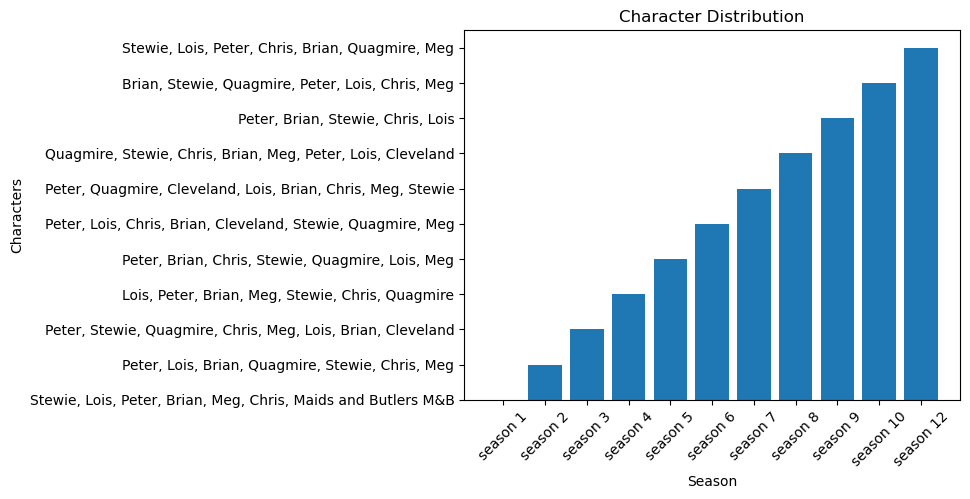

In [17]:
# Grouping data by season and extracting unique characters
unique_characters = df.groupby('seasons')['character'].unique()

# Define the desired order of seasons
sorted_labels = ['season {}'.format(i) for i in range(1, 13)]  # Adjust the range as per your seasons

# Sorting the seasons based on the sorted_labels
seasons = unique_characters.index.astype(str)
seasons = sorted(seasons, key=lambda x: sorted_labels.index(x))

# Converting the unique characters to a list of strings
characters_list = [', '.join(characters) for characters in unique_characters.values]

# Plotting the bar plot
plt.bar(seasons, characters_list)

# Adding labels and title
plt.xlabel('Season')
plt.xticks(rotation=45)
plt.ylabel('Characters')
plt.title('Character Distribution')

# Displaying the plot
plt.show()


In [50]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\patra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
from wordcloud import WordCloud, STOPWORDS
import string

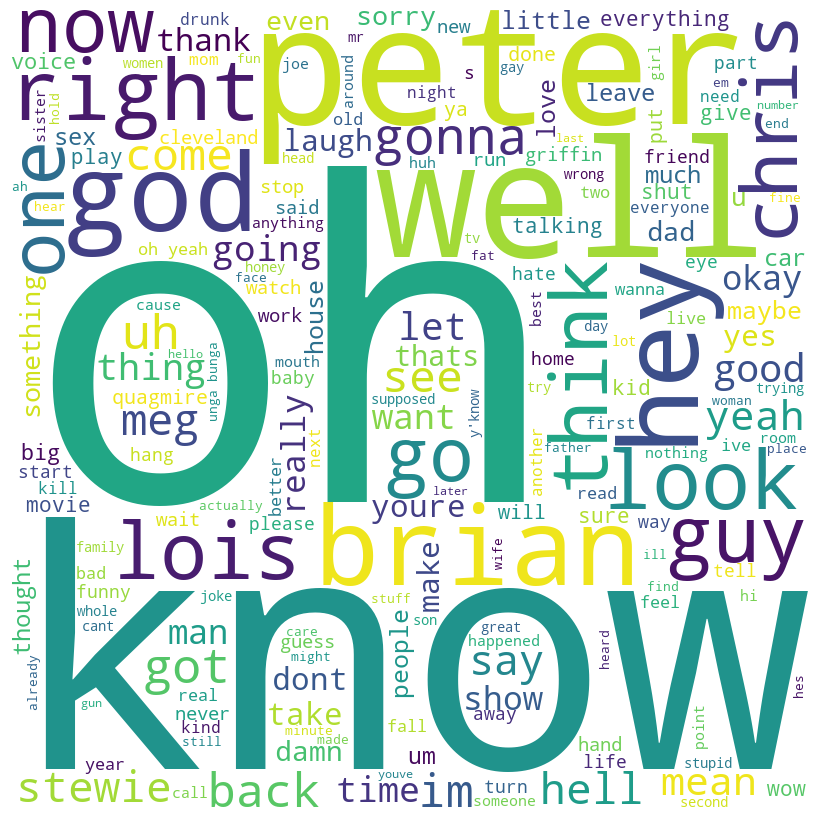

In [20]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.dialog:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

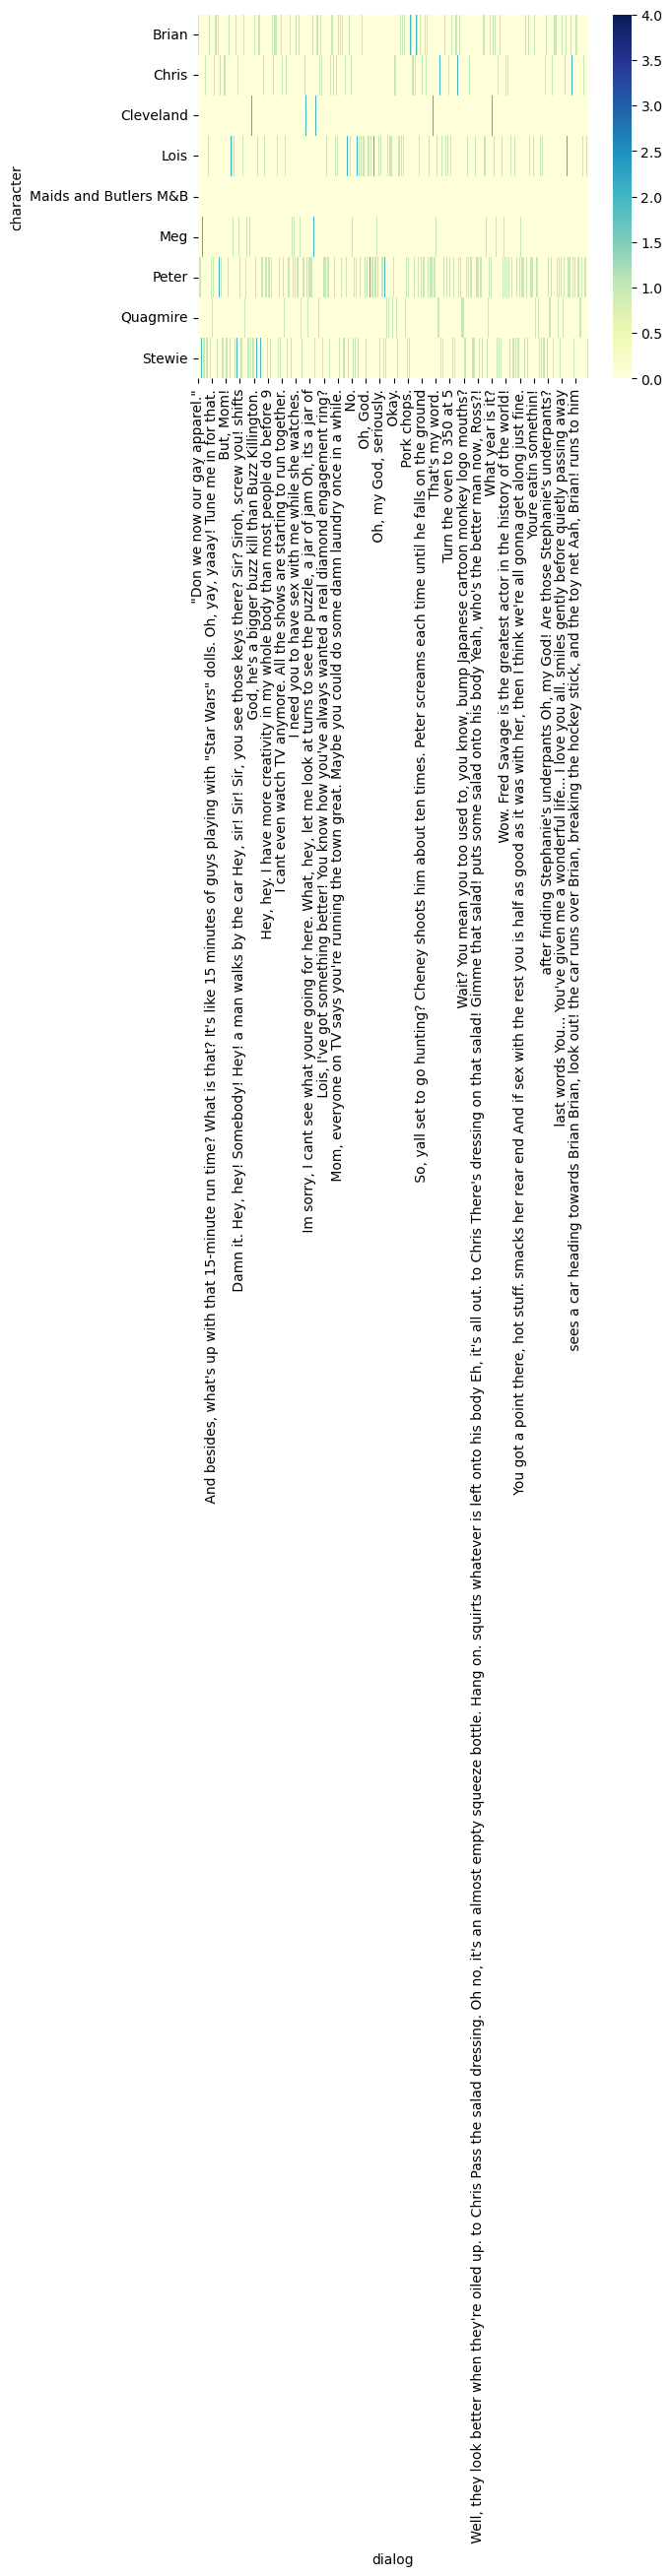

In [59]:
# character occurence
grouped = df.groupby(['character', 'dialog']).size().reset_index(name='count')
pivot_table = grouped.pivot(index='character', columns='dialog', values='count').fillna(0)
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(pivot_table, cmap='YlGnBu')
plt.show()


In [21]:
seasons_dialogue = df.groupby('seasons')['dialog'].apply(' '.join).reset_index()
seasons_dialogue.columns = ['seasons', 'concatenated_dialogue']
print(seasons_dialogue.head())

     seasons                              concatenated_dialogue
0   season 1   Damn you, vile woman! Youve impeded my work s...
1  season 10   Your old boyfriend? The one with the penis?  ...
2  season 12   to Lois I want you on my team for everything....
3   season 2   Your Holiness, this is such an honor! Please,...
4   season 3   A degenerate, am I? Well, you are a festisio!...


In [22]:
# Load the regular expression library
import re

# Remove punctuation
seasons_dialogue['dialog_processed'] = seasons_dialogue['concatenated_dialogue'].apply(lambda x: re.sub('[,\.!?]', '', x))

# Convert the dialogues to lowercase
seasons_dialogue['dialog_processed'] = seasons_dialogue['dialog_processed'].apply(lambda x: x.lower())

# Print out the first rows of the processed dialogues
print(seasons_dialogue['dialog_processed'].head())


0     damn you vile woman youve impeded my work sin...
1     your old boyfriend the one with the penis  sh...
2     to lois i want you on my team for everything ...
3     your holiness this is such an honor please go...
4     a degenerate am i well you are a festisio see...
Name: dialog_processed, dtype: object


In [23]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = seasons_dialogue.dialog_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['damn', 'vile', 'woman', 'youve', 'impeded', 'work', 'since', 'day', 'escaped', 'wretched', 'womb', 'hello', 'mother', 'well', 'hi', 'sweetie', 'know', 'mother', 'life', 'like', 'box', 'chocolates', 'never', 'know', 'youre', 'going', 'get', 'life', 'however', 'like']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\patra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:40])

[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 3), (21, 1), (22, 1), (23, 1), (24, 4), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 3), (37, 1), (38, 1), (39, 1)]


In [31]:
from pprint import pprint
# number of topics

num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,workers=1)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]


[(0,
  '0.020*"oh" + 0.010*"peter" + 0.009*"meg" + 0.009*"know" + 0.008*"get" + '
  '0.007*"well" + 0.007*"brian" + 0.007*"like" + 0.006*"hey" + 0.006*"right"'),
 (1,
  '0.015*"oh" + 0.010*"peter" + 0.010*"know" + 0.009*"well" + 0.006*"brian" + '
  '0.006*"hey" + 0.006*"get" + 0.006*"like" + 0.005*"right" + 0.005*"think"'),
 (2,
  '0.012*"oh" + 0.009*"well" + 0.009*"know" + 0.009*"meg" + 0.007*"like" + '
  '0.007*"right" + 0.006*"brian" + 0.006*"peter" + 0.006*"get" + 0.005*"lois"'),
 (3,
  '0.014*"oh" + 0.009*"know" + 0.008*"peter" + 0.007*"like" + 0.006*"get" + '
  '0.006*"hey" + 0.006*"well" + 0.005*"god" + 0.005*"right" + 0.005*"chris"'),
 (4,
  '0.012*"oh" + 0.007*"peter" + 0.006*"know" + 0.005*"well" + 0.005*"get" + '
  '0.005*"meg" + 0.005*"brian" + 0.005*"hey" + 0.005*"like" + 0.004*"right"'),
 (5,
  '0.018*"oh" + 0.010*"know" + 0.009*"well" + 0.009*"like" + 0.008*"peter" + '
  '0.006*"hey" + 0.006*"brian" + 0.005*"uh" + 0.005*"get" + 0.005*"im"'),
 (6,
  '0.018*"oh" + 0.010*"k

In [32]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
import os

directory = './results/'
os.makedirs(directory, exist_ok=True)
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.003709 -0.003524       1        1  28.701523
5     -0.014179  0.005079       2        1  28.545071
9     -0.007609 -0.006254       3        1  16.063949
0      0.004307 -0.002984       4        1  15.170132
8      0.002827 -0.003180       5        1  11.426641
6     -0.003262  0.000035       6        1   0.043573
7     -0.000157  0.001010       7        1   0.012278
2      0.005274  0.003880       8        1   0.012278
3      0.002587 -0.000142       9        1   0.012278
4      0.006501  0.006079      10        1   0.012277, topic_info=       Term        Freq       Total Category  logprob  loglift
168      oh  154.000000  154.000000  Default  30.0000  30.0000
130    know   92.000000   92.000000  Default  29.0000  29.0000
179   peter   81.000000   81.000000  Default  28.0000  28.0000
256    well   75.000000   75.000000  Default  27.0000  27.0000
138    like   67.000000   67.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
87      god    0.003512   47.564554  Topic10  -5.7472  -0.5085
807    yeah    0.003248   40.817877  Topic10  -5.8253  -0.4336
223  stewie    0.002983   34.337470  Topic10  -5.9103  -0.3458
91     good    0.002915   34.985493  Topic10  -5.9335  -0.3877
247      uh    0.002881   37.838740  Topic10  -5.9454  -0.4780

[790 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
269       1  0.463183  accent
269       3  0.463183  accent
1942      4  0.535879     age
819       1  0.402121      ah
819       2  0.268081      ah
...     ...       ...     ...
267       5  0.082001   youre
1412      1  0.333864  youyou
1412      2  0.333864  youyou
1412      3  0.333864  youyou
1206      1  0.693404  zillow

[972 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 6, 10, 1, 9, 7, 8, 3, 4, 5])